In [0]:
# Import the machine learning libraries.
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [0]:
# Load the Parkinson's Disease dataset.
# The dataset can be downloaded here: https://drive.google.com/file/d/1er9NJTLUA3qnRuyhfzuN0XUsoIC4a-_q/view
df = pd.read_csv('/content/drive/My Drive/ML_Code/Fake News Detection/news.csv')

In [19]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [20]:
df.shape

(6335, 4)

In [21]:
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [0]:
# Split a dataset into X and y.
X = df['text']
y = labels

In [0]:
# Split the dataset into the training set and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [0]:
# Vectorization.
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train = tfidf_vectorizer.fit_transform(X_train) 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [25]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [0]:
y_pred = pac.predict(tfidf_test)

In [27]:
# Print classification report.
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        FAKE       0.94      0.93      0.93       933
        REAL       0.93      0.94      0.93       968

    accuracy                           0.93      1901
   macro avg       0.93      0.93      0.93      1901
weighted avg       0.93      0.93      0.93      1901



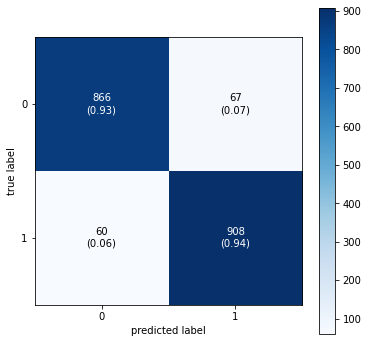

CPU times: user 175 ms, sys: 1.71 ms, total: 177 ms
Wall time: 178 ms


In [28]:
# Plot the confusion matrix.
%%time
from mlxtend.plotting import plot_confusion_matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(6,6))
plt.show()

In [29]:
# Print accuracy.
print("Accuracy:", metrics.accuracy_score(y_test, y_pred), "\n")

Accuracy: 0.9331930562861652 

